In [1]:
import matplotlib.pyplot as plt # PARA LOS PLOTS
import numpy as np # PARA OPERACIONES MATRICIALES
import time #PARA ANIMAR LOS PLOTS

In [2]:
def visualize(matrix, current):
    plt.clf()
    rows, cols = matrix.shape
    cmap = plt.colormaps['Blues'] 

    plt.scatter(current[1], current[0], color='red', marker='o', s=100, label='Actual')

    # inicio en verde
    plt.scatter(start[1], start[0], color='green', marker='o', s=100, label='Inicio')

    # Meta en naranja
    plt.scatter(end[1], end[0], color='orange', marker='o', s=100, label='Final')

    plt.imshow(matrix, cmap=cmap, vmin=0, vmax=2)
    plt.legend()

    plt.pause(0.1)

def dijkstra(cost_matrix ,matrix, start, end):
    rows, cols = matrix.shape
    distance = np.full((rows, cols), np.inf)  # Inicializa todas las distancias como infinito
    visited = np.zeros((rows, cols), dtype=bool)
    prev = np.zeros((rows, cols, 2), dtype=int)  # Almacena los nodos previos para reconstruir el camino

    distance[start] = 0

    while True:
        # Encuentra el nodo no visitado con la distancia mínima
        min_distance = np.inf
        current = None
        for r in range(rows):
            for c in range(cols):
                if not visited[r, c] and distance[r, c] < min_distance:
                    min_distance = distance[r, c]
                    current = (r, c)

        if current is None:
            break

        r, c = current
        visited[r, c] = True

        # Verifica vecinos
        for dr, dc in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            nr, nc = r + dr, c + dc
            if 0 <= nr < rows and 0 <= nc < cols and not visited[nr, nc] and matrix[nr, nc] == 0: #busca en los vecinos y verifica que no sea un obstáculo
                new_distance = distance[r, c] + cost_matrix[nr, nc]  # Costo de movimiento entre celdas 
                if new_distance < distance[nr, nc]:
                    distance[nr, nc] = new_distance
                    prev[nr, nc] = (r, c)

    # Reconstruir el camino desde el final hasta el inicio
    path = []
    r, c = end
    while (r, c) != start:
        path.append((r, c))
        r, c = prev[r, c]
    path.append(start)
    path.reverse()

    return path

# Representación de la matriz malla 0=libre 2= obstáculo
matrix = np.array([
    [0, 0, 2, 0, 0],
    [0, 2, 0, 2, 0],
    [0, 0, 0, 2, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 2, 0]
]) 

start = (0, 0)  #  inicio
end = (0, 4)    # meta

min_costo = 1
max_costo = 11

# Generar una matriz de costos aleatorios para las celdas libres
random_costs = np.random.randint(min_costo, max_costo + 1, size=matrix.shape)

# Crear la cost_matrix combinando los costos aleatorios con la matriz original
cost_matrix = np.where(matrix == 0, random_costs, np.inf)

print(matrix)
print("---------------------------------------------")
print(cost_matrix)


[[0 0 2 0 0]
 [0 2 0 2 0]
 [0 0 0 2 0]
 [0 0 0 0 0]
 [0 0 0 2 0]]
---------------------------------------------
[[11. 10. inf  4.  7.]
 [ 4. inf  1. inf  2.]
 [ 2.  6.  8. inf  5.]
 [ 7.  7.  6.  7. 10.]
 [ 8.  3.  7. inf  8.]]


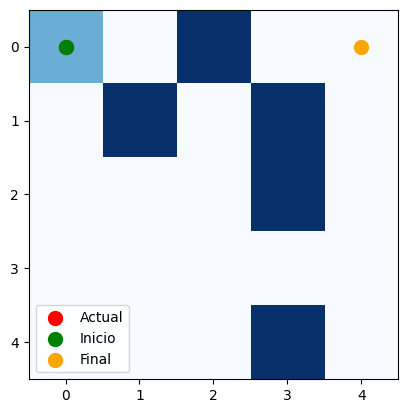

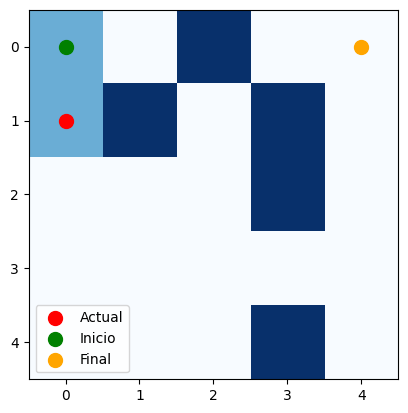

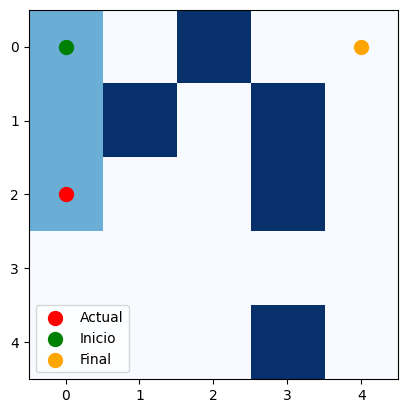

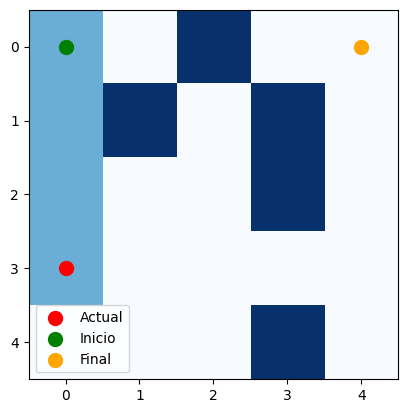

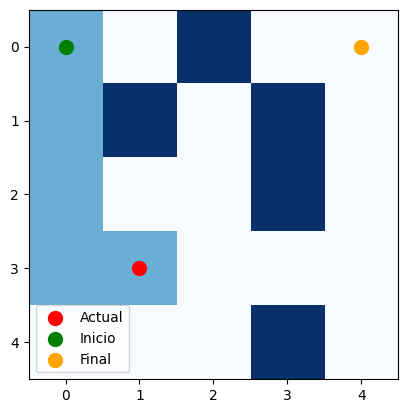

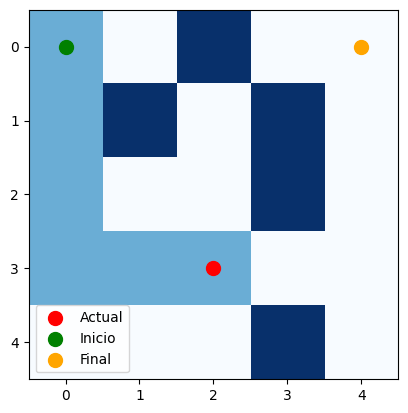

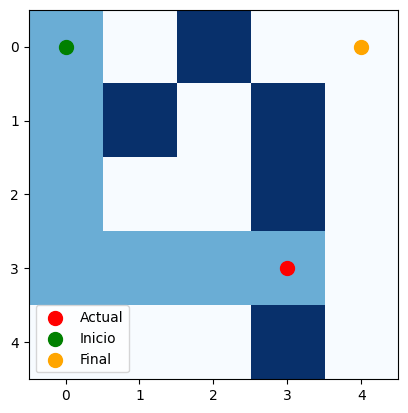

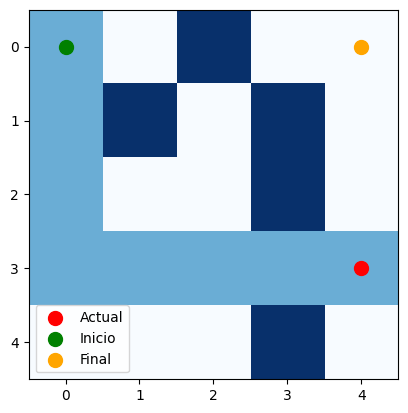

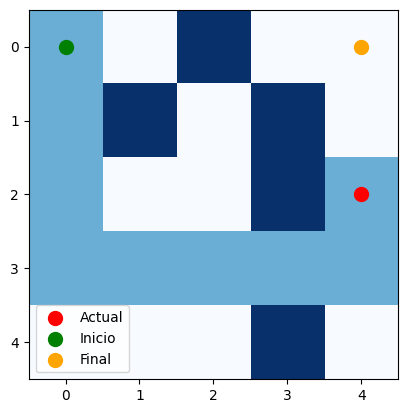

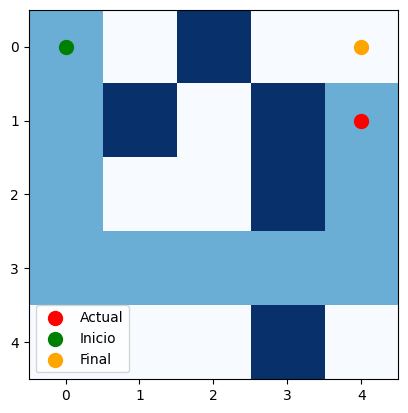

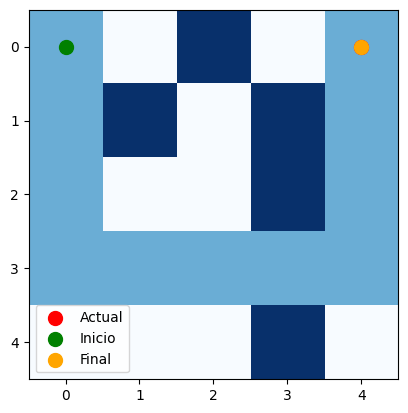

In [7]:
path = dijkstra(cost_matrix, matrix, start, end)

plt.ion()

for current in path:
    matrix[current] = 1  
    visualize(matrix, current)
    time.sleep(0.5)

plt.ioff()
plt.show()